 # Generate a word cloud for the most frequent keywords found in 5-star reviews, but exclude common stopwords and app names. Additionally, filter the reviews to include only those from apps in the "Health & Fitness" category.



# importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import plotly.express as px



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# loading datasets

In [12]:
apps_df=pd.read_csv('google playstore data.csv')
apps_df.head()
review_df=pd.read_csv('user reviews data.csv')
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# filtering health and fitness apps 

In [ ]:
health_fitness_apps = apps_df[apps_df['Category']=='HEALTH_AND_FITNESS']['App'].unique() 
print(health_fitness_apps)

['Home Workout - No Equipment' 'Step Counter - Calorie Counter'
 'Lose Belly Fat in 30 Days - Flat Stomach'
 'Pedometer - Step Counter Free & Calorie Burner'
 'Six Pack in 30 Days - Abs Workout' 'Lose Weight in 30 Days' 'Pedometer'
 'LG Health' 'Step Counter - Pedometer Free & Calorie Counter'
 'Pedometer, Step Counter & Weight Loss Tracker App'
 'Sportractive GPS Running Cycling Distance Tracker'
 '30 Day Fitness Challenge - Workout at Home'
 'Home Workout for Men - Bodybuilding'
 'Fat Burning Workout - Home Weight lose' 'Buttocks and Abdomen'
 'Walking for Weight Loss - Walk Tracker' 'Running & Jogging'
 'Walk with Map My Walk' 'Sleep Sounds' 'Fitbit'
 'Lose Belly Fat-Home Abs Fitness Workout'
 'Runtastic Running App & Mile Tracker' 'Cycling - Bike Tracker'
 'Abs Training-Burn belly fat' 'Calorie Counter - EasyFit free'
 'Nike+ Run Club' 'Aunjai i lert u' 'Garmin Connect™'
 'BetterMe: Weight Loss Workouts' 'Bike Computer - GPS Cycling Tracker'
 'Calorie Counter - MyFitnessPal'
 'Six 

# filtering reviews for these apps

In [5]:
health_fitness_reviews = review_df[review_df['App'].isin(health_fitness_apps)]
print(health_fitness_reviews)


                                                     App  \
0                                  10 Best Foods for You   
1                                  10 Best Foods for You   
2                                  10 Best Foods for You   
3                                  10 Best Foods for You   
4                                  10 Best Foods for You   
...                                                  ...   
62971  Home workouts - fat burning, abs, legs, arms,c...   
62972  Home workouts - fat burning, abs, legs, arms,c...   
62973  Home workouts - fat burning, abs, legs, arms,c...   
62974  Home workouts - fat burning, abs, legs, arms,c...   
62975  Home workouts - fat burning, abs, legs, arms,c...   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   

# Taking 5 start reviews ( assuming positive reviews as 5 start reviews) 

In [6]:
positive_reviews = health_fitness_reviews[health_fitness_reviews['Sentiment']=='Positive']
positive_reviews= positive_reviews.dropna(subset=['Translated_Review'])


# Creating a single string of all the words present positive reviews

In [ ]:
all_text=' '.join(positive_reviews['Translated_Review'].dropna())


# Removing Stopwords

In [ ]:
custom_stopwords= set(stopwords.words('english'))
custom_stopwords.update(map(str.lower,health_fitness_apps)) 
print(custom_stopwords)

{'wouldn', 'once', 'couch to 5k by rundouble', 'theirs', 'home workout - no equipment', 'pregnancy tracker', 'abs workout - 30 days fitness app for six pack abs', 'who', '6 pack promise - ultimate abs', "i'd", 'bd provider app', "hadn't", 'themselves', "that'll", 'm', 'no', 'she', 'santa fe thrive', 'them', 'my diet coach - weight loss motivation & tracker', 'lark - 24/7 health coach', 'few', 'revita.bg', 'daily ab workout - core & abs fitness exercises', 'after', "doesn't", 'zombies, run! 5k training (free)', 'h band 2.0', 'white sound pro', 'monitor your weight', 'bodyworks dw', 'geocaching®', 'cb nfc pendant', 'ultimate ab & core workouts', 'aunjai i lert u', 'were', 'the daily bj', '30 day ab challenge - lumowell', 'cf spot', 'below', "he'd", 'cycling - bike tracker', 'ideal weight, bmi calculator', 'workout trainer: fitness coach', 'tracks', 'spot on period, birth control, & cycle tracker', 'h-connect', 'mightn', 'run on earth', '8fit workouts & meal planner', "needn't", 'florida 

# creating a wordcloud 

In [ ]:
wordcloud=WordCloud(width=700,height=300,stopwords=custom_stopwords,background_color='#2B1E40').generate(all_text)


# presenting wordcloud 

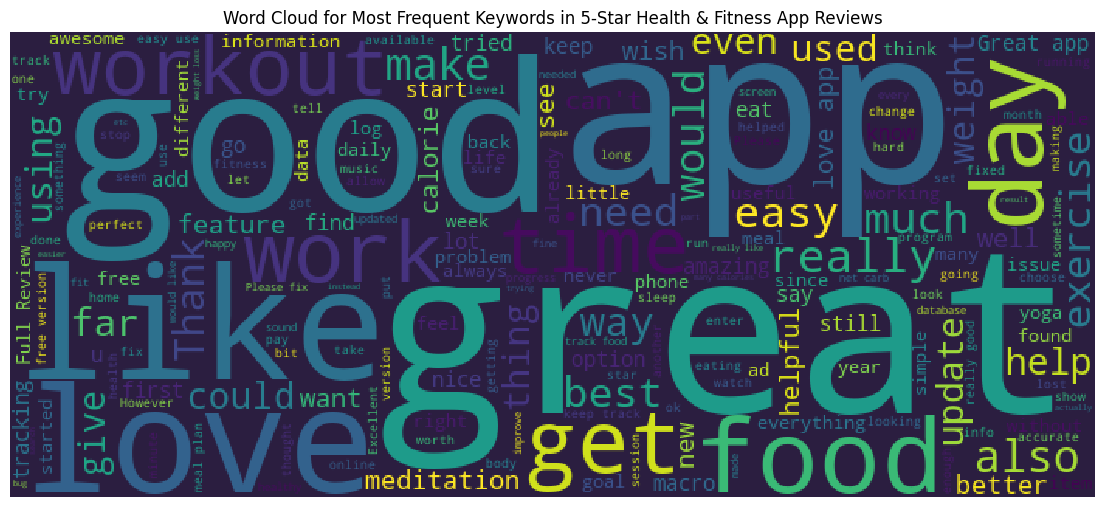

In [10]:
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis('off')
plt.title('Word Cloud for Most Frequent Keywords in 5-Star Health & Fitness App Reviews')
plt.show()

#  